# Disease Prediction using NLP

## Parsing through the data

In [26]:
#loading the requirements
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import string

In [2]:
#loading the training dataset
training_data = pd.read_csv('drugsComTrain_raw.csv')
training_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
#checking for shape
training_data.shape

(161297, 7)

In [4]:
#checking for missing values
training_data.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
#checking for the most common conditions
training_data['condition'].value_counts(normalize=True)

Birth Control                                              0.179479
Depression                                                 0.056541
Pain                                                       0.038311
Anxiety                                                    0.036808
Acne                                                       0.034838
                                                             ...   
Dissociative Identity Disorde                              0.000006
Hydrocephalus                                              0.000006
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL    0.000006
Q Feve                                                     0.000006
Neutropenia                                                0.000006
Name: condition, Length: 884, dtype: float64

In [6]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", training_data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", training_data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", training_data['date'].min())
print("Ending Date :", training_data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions present in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


In [7]:
# summarizing the Dataset

training_data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [8]:
# lets summarize Categorical data also
training_data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [9]:
#dropping the missing values of the conditions

training_data = training_data.dropna()

training_data.isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [10]:
#checking the new shape
training_data.shape

(160398, 7)

In [11]:
# Loading the tesst dataset

test_data = pd.read_csv('drugsComTest_raw.csv')

test_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [12]:
#checking for the shape
test_data.shape

(53766, 7)

In [13]:
#checking for missing values
test_data.isna().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [14]:
#dropping the missing values for the condition column
test_data = test_data.dropna()

test_data.isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [15]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", test_data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", test_data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", test_data['date'].min())
print("Ending Date :", test_data['date'].max())

Number of Unique Drugs present in the Dataset : 2635
Number of Unique Medical Conditions present in the Dataset : 708

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


In [16]:
# summarizing the Dataset

test_data[['rating','usefulCount']].describe()

,rating,usefulCount
count,53471.000000,53471.000000
mean,6.976829,28.083634
std,3.286228,36.231706
min,1.000000,0.000000
25%,4.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,949.000000


In [17]:
# lets summarize Categorical data also
test_data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,53471,53471,53471
unique,2635,708,48051
top,Levonorgestrel,Birth Control,"""Good."""
freq,1265,9648,8


# EDA

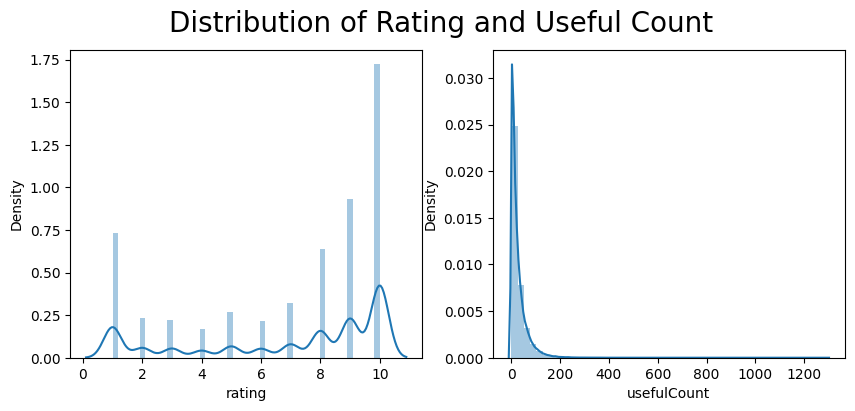

In [18]:
# lets check the Distribution of Rating and Useful Count
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(training_data['rating'])

plt.subplot(1, 2, 2)
sns.distplot(training_data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

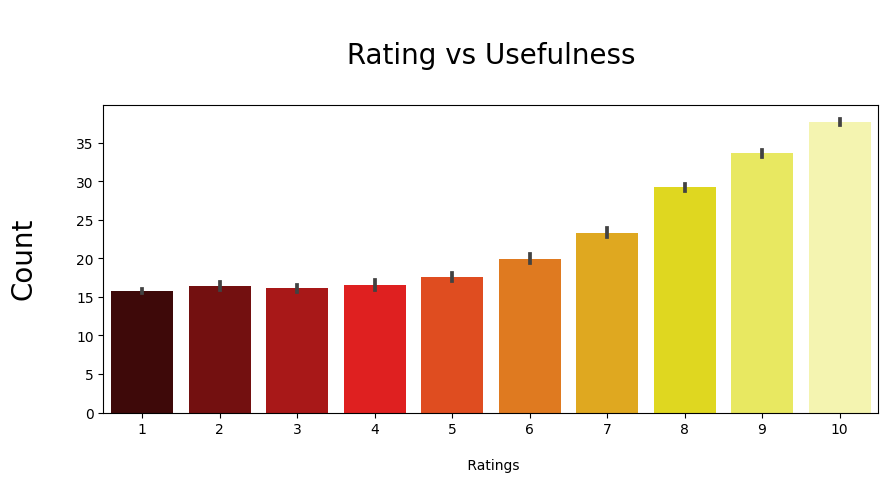

In [19]:
# lets check the Impact of Ratings on Usefulness

plt.rcParams['figure.figsize'] = (10, 4)
sns.barplot(x = training_data['rating'], y = training_data['usefulCount'], palette = 'hot')
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [20]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
training_data['len']  = training_data['review'].apply(len)

training_data['len']

0          79
1         741
2         755
3         448
4         719
         ... 
161292    689
161293    262
161294     95
161295    772
161296    347
Name: len, Length: 160398, dtype: int64

In [21]:
training_data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

# Cleaning of the reviews

In [22]:
# Parcing through a sample of reviews

sample_review = training_data['review'][1]
print(sample_review)

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."


The reviews have punctuations, stop words and capitalized

In [23]:
# removing the capitalization

training_data['cleaned_review'] = training_data['review'].str.lower()
training_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755,"""i used to take another oral contraceptive, wh..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,448,"""this is my first time using any form of birth..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,"""suboxone has completely turned my life around..."


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#removing punctuations

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

training_data['review'] = training_data['review'].apply(punctuation_removal)

In [29]:
# Removing the stop words and punctuations
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

#stop words

#set(stopwords.words('english')) 

stop_word_list = (stopwords.words('english'))
print(stop_word_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
stop_words = []

for item in stop_word_list: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

training_data['review'] = training_data['review'].apply(stopwords_removal)

In [31]:
#removing number
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

training_data['review'] = training_data['review'].apply(drop_numbers)

In [32]:
training_data.head(2)

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27,79,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,741,"""my son is halfway through his fourth week of ..."


In [33]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

def lemma(list_text):
    list_new = []
    for i in list_text.split(' '):
        wnl.lemmatize(i)
        list_new.append(i)
    return ' '.join(list_new)
    
training_data['cleaned_review'] = training_data['review'].apply(lemma)

In [34]:
training_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27,79,side effect take combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,741,son halfway fourth week intuniv became concern...
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,14-Dec-09,17,755,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,first time using form birth control glad went ...,8,3-Nov-15,10,448,first time using form birth control glad went ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,719,suboxone completely turned life around feel he...


In [35]:
#Test data reviews

test_data['cleaned_review'] = test_data['review'].str.lower()

test_data['review'] = test_data['review'].apply(punctuation_removal)

test_data['review'] = test_data['review'].apply(stopwords_removal)

test_data['review'] = test_data['review'].apply(drop_numbers)

test_data['cleaned_review'] = test_data['review'].apply(lemma)

test_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
0,163740,Mirtazapine,Depression,tried antidepressants years citalopram fluoxet...,10,28-Feb-12,22,tried antidepressants years citalopram fluoxet...
1,206473,Mesalamine,"Crohn's Disease, Maintenance",son disease done well asacol complaints shows ...,8,17-May-09,17,son disease done well asacol complaints shows ...
2,159672,Bactrim,Urinary Tract Infection,quick reduction symptoms,9,29-Sep-17,3,quick reduction symptoms
3,39293,Contrave,Weight Loss,contrave combines drugs used alcohol smoking o...,9,5-Mar-17,35,contrave combines drugs used alcohol smoking o...
4,97768,Cyclafem 1 / 35,Birth Control,birth control one cycle reading reviews type s...,9,22-Oct-15,4,birth control one cycle reading reviews type s...


In [36]:
training_data = training_data.drop(columns ='review')
test_data = test_data.drop(columns='review')

In [37]:
test_data.head(5)

,uniqueID,drugName,condition,rating,date,usefulCount,cleaned_review
0,163740,Mirtazapine,Depression,10,28-Feb-12,22,tried antidepressants years citalopram fluoxet...
1,206473,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,son disease done well asacol complaints shows ...
2,159672,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,quick reduction symptoms
3,39293,Contrave,Weight Loss,9,5-Mar-17,35,contrave combines drugs used alcohol smoking o...
4,97768,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,birth control one cycle reading reviews type s...


# Modelling

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Creating TF-IDF vectorizer and transforming the corpus

vectorizer = TfidfVectorizer()
X_train = (vectorizer.fit_transform(training_data.cleaned_review))

# transforms test reviews to above vectorized format
X_test = (vectorizer.transform(test_data.cleaned_review))

In [40]:
#y_train and y_test
y_train= training_data['condition']

y_test = test_data['condition']

In [41]:
#binary encoding the y_train and y_test
clf = MultinomialNB().fit(X_train, y_train)


In [42]:
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test))

Accuracy: 0.3057358194161321
Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
#import time

#start = time.time()
#rfc_rating = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)
##rfc_rating.fit(X_train, y_train)
#end = time.time()
#print("Training time: %s" % str(end-start))

# Evaluates model on test set
#pred = rfc_rating.predict(X_test)

#print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test)))
#print("Confusion Matrix")
#print(confusion_matrix(pred, y_test))

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

import pickle

X_train = training_data['cleaned_review']
X_test = test_data['cleaned_review']

y_train = training_data['condition']
y_test = test_data['condition']

pipeline = Pipeline([('vect', vectorizer),
                     ('clf', SGDClassifier(loss='modified_huber', max_iter=5, tol=None))])
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
y_hat = model.predict(X_test)
print(accuracy_score(y_test, y_hat))
print(classification_report(ytest, y_hat ))
print(confusion_matrix(ytest, y_hat))

0.7017822745039367
                                                                precision    recall  f1-score   support

                    0</span> users found this comment helpful.       0.00      0.00      0.00        24
                  100</span> users found this comment helpful.       0.00      0.00      0.00         1
                  105</span> users found this comment helpful.       0.00      0.00      0.00         1
                   10</span> users found this comment helpful.       0.00      0.00      0.00        10
                   11</span> users found this comment helpful.       0.00      0.00      0.00         4
                   12</span> users found this comment helpful.       0.00      0.00      0.00         9
                  135</span> users found this comment helpful.       0.00      0.00      0.00         1
                   13</span> users found this comment helpful.       0.00      0.00      0.00         5
                   14</span> users found thi

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]


In [47]:
resultInteger = model.predict(["unable to sleep properly", 
"pain in my abdomen", 
"severe headache and nasuea", 
"red, itchy and watery eyes", 
"lose motions and stomach upset",
"looking to reduce smoking and possibly quit",
"concerned that i am pregnant and don't want to have this baby", 
"pain in my forehead and temples, unable to sleep properly",
"feeling bloated and like my food comes up to my throat like acid reflux", 
"feeling weak and don't want to eat food. Feeling anxious about exams.", 
"feeling stressed, been unable to sleep and spending too much time worrying", 
"coughing violently and throat is sore",
"my son is aggressive and violent does not listen, easily distracted", 
"my daughter is having irregular periods and is suffering from pain",
"i am unable to pass urine easily, i feel pain when going to the toilet",
"i am feeling tired and anxious."])
resultInteger = 

array(['Insomnia', 'Pain', 'Headache', 'Conjunctivitis, Allergic',
       'Rheumatoid Arthritis', 'Smoking Cessation', 'Birth Control',
       'Pain', 'GERD', 'Diabetes, Type 2', 'Anxiety', 'Cough', 'ADHD',
       'Birth Control', 'Constipation', 'Anxiety'], dtype='<U67')

In [48]:
result = model.predict(['i have a lump in my back'])
result

array(['Diabetes, Type 2'], dtype='<U67')